# Project: Investigate a Dataset - TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The entertainment industry has been a major contributor to the growth of many country's Gross Domestic Product (GDP) since the advent of modern technology. More specifically, the movie sector, contributing over 40% to the growth of the industry's GDP, has continued to experience rise in revenue over the years.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The following columns are contained in the data set. columns: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue_adj.

Identifiying and understanding the major factors contributing to the continuous rise in the sector's revenue is the crux of this analysis. In this Exploratory Data Analysis, some questions relating to the subject matter will be addressed using IMBD dataset. These questions include:
> 1. what is the relationship between revenue and the following - budget, popularity score, runtime, voting average?
>
> 2. what is the impact of budget on revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Here, the data is loaded for preprocessing and cleaning
df=pd.read_csv('C:/Users/LISANDRO/project/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# To examine the number of rows and columns in the data set.
df.shape 

(10866, 21)

In [4]:
# Here, we seek to know more about the data set we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### From the general information above, it is obvious that there are issues to be addressed in this data set. These issues include:
> 1. **Correcting the datatype.** For example, changing the datatype for 'release_date' from string to datatime
>
> 2. **Filling missing values.** The Non_Null Count for each column is not equal, implying that some values are missing.
>
> 3. **Dropping unnecessary Features.** Some features are not useful in the scope of this analysis. Some of these features include cast, homepage, tagline, keywords, etc.
##### To further understand this data set, the next cell explores the basic summary statistics assocciated with each variable.

In [5]:
# Here, we explore the descriptive summary of data set.
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


##### The descriptive statistics table above provides us with basic descriptive information about thie data set. From the output above, we can extract the following:
> 1. The minimum amount spent on budget, revenue, budget_adj and revenue_adj is zero (0). This is unacceptable.
>
> 2. The maximum runtime for a movie is 900 minutes. This indicates an outlier.
##### These issues are addressed in the next section - data cleaning section.




### Data Cleaning

#### Here, we addresed the  various issues noted in the previous section of this report. These issues include:
> 1. **Correcting the datatype.** For example, changing the datatype for 'release_date' from string to datatime.
>
> 2. **Filling missing values.** The Non_Null Count for each column is not equal, implying that some values are missing.
>
> 3. **Dropping unnecessary features.** Some of these features include cast, homepage, tagline, keywords, etc.
>
> 4. **Managing data ranges.** It is unrealistic for movies to have a runtime of 900 minutes.

#### Correcting the datatype

In [6]:
#To correct the datatype for release_date from string to date format
from datetime import datetime as dt
df['release_date'] = pd.to_datetime(df['release_date'])

#### Filling Missing Values and Addressing Blanks

In [7]:
# Given that "Woody Allen" is the most popular director in this dataset, 
# it is acceptable to fill blank spaces with "Woody Allen"
df["director"]=df["director"].fillna("Woody Allen")

In [8]:
# Here, I decided to drop rows without an imdb_id 
df.dropna(subset=["imdb_id"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10856 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10856 non-null  float64       
 3   budget                10856 non-null  int64         
 4   revenue               10856 non-null  int64         
 5   original_title        10856 non-null  object        
 6   cast                  10780 non-null  object        
 7   homepage              2934 non-null   object        
 8   director              10856 non-null  object        
 9   tagline               8039 non-null   object        
 10  keywords              9369 non-null   object        
 11  overview              10853 non-null  object        
 12  runtime               10856 non-null  int64         
 13  genres          

In [9]:
# Here, I removed duplicate rows from the data set
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

#### Dropping Features

In [10]:
# For this analysis, quantitative variables are more important.
# Thus, the following variables are dropped to promote clarity
columns=["cast","homepage","tagline","keywords","overview","genres","production_companies"]
for i in columns:
    del df[i]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10855 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10855 non-null  float64       
 3   budget          10855 non-null  int64         
 4   revenue         10855 non-null  int64         
 5   original_title  10855 non-null  object        
 6   director        10855 non-null  object        
 7   runtime         10855 non-null  int64         
 8   release_date    10855 non-null  datetime64[ns]
 9   vote_count      10855 non-null  int64         
 10  vote_average    10855 non-null  float64       
 11  release_year    10855 non-null  int64         
 12  budget_adj      10855 non-null  float64       
 13  revenue_adj     10855 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10855 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10855 non-null  float64       
 3   budget          10855 non-null  int64         
 4   revenue         10855 non-null  int64         
 5   original_title  10855 non-null  object        
 6   director        10855 non-null  object        
 7   runtime         10855 non-null  int64         
 8   release_date    10855 non-null  datetime64[ns]
 9   vote_count      10855 non-null  int64         
 10  vote_average    10855 non-null  float64       
 11  release_year    10855 non-null  int64         
 12  budget_adj      10855 non-null  float64       
 13  revenue_adj     10855 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


#### Managing Ranges

In [12]:
def mean_fill(column):
    '''Returns the mean of a column'''
    col_mean=column.mean()
    return col_mean

In [13]:
# Here, budget values less than 100000 have been replaced with the mean bugdet
budget_mean=mean_fill(df["budget"])
df.loc[df["budget"]<100000,"budget"] = budget_mean
df["budget"].min()

100000.0

In [14]:
# Here, revenue values less than 100000 have been replaced with the mean revenue
revenue_mean=mean_fill(df["revenue"])
df.loc[df["revenue"]<100000,"revenue"] = revenue_mean
df["revenue"].min()

100000.0

In [15]:
# Here, budget_adj values less than 100000 have been replaced with the mean bugdet_adj
bud_adj=mean_fill(df["budget_adj"])
df.loc[df["budget_adj"]<100000,"budget_adj"] = bud_adj
df["budget_adj"].min()

100000.0

In [16]:
# Here, revenue_adj values less than 100000 have been replaced with the mean revenue_adj
revenue_adj=mean_fill(df["revenue_adj"])
df.loc[df["revenue_adj"]<100000,"revenue_adj"] = revenue_adj
df["revenue_adj"].min()

100222.075052341

In [17]:
# it is quite unrealistic to see standard movies less than 60 minutes. 
# For the purpose of this project, I set the minimum runtime at 90 minutes
runtime_mean=df["runtime"].mean()
df.loc[df["runtime"]<90,"runtime"] = runtime_mean
df["runtime"].min()

90.0

In [18]:
# it is quite unrealistic to see standard movies greater than 240 minutes. 
# For the purpose of this project, I set the maximum runtime at 240 minutes.
df.loc[df["runtime"]>240,"runtime"] = runtime_mean
df["runtime"].max()

240.0

In [19]:
df.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10855.000000,10855,10855.000000,1.085500e+04,1.085500e+04,10855,10855,10855.000000,10855,10855.000000,10855.000000,10855.000000,1.085500e+04,1.085500e+04
unique,NaN,10855,NaN,NaN,NaN,10561,5064,NaN,5907,NaN,NaN,NaN,NaN,NaN
top,NaN,tt1185834,NaN,NaN,NaN,Hamlet,Woody Allen,NaN,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,4,85,NaN,28,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2071-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,65959.191617,NaN,0.646832,2.246681e+07,6.269791e+07,NaN,NaN,107.064362,NaN,217.584155,5.973865,2001.313128,2.694036e+07,8.088251e+07
std,92018.246342,NaN,1.000591,2.793688e+07,1.107714e+08,NaN,NaN,16.671532,NaN,575.877532,0.934604,12.815672,3.041776e+07,1.362116e+08
min,5.000000,NaN,0.000065,1.000000e+05,1.000000e+05,NaN,NaN,90.000000,NaN,10.000000,1.500000,1960.000000,1.000000e+05,1.002221e+05
25%,10591.500000,NaN,0.207733,1.463776e+07,3.986359e+07,NaN,NaN,98.000000,NaN,17.000000,5.400000,1995.000000,1.756606e+07,5.141632e+07


<a id='eda'></a>
## Exploratory Data Analysis

#### We explore this cleaned data set at this point to answer key research questions about the data set. This objective will be achieved using statistical computaions and data visualizations. Recall, two research questions were posed. They are:
> 1. what is the relationship between revenue and the following - budget, popularity score, runtime, voting average?
>
> 2. what is the impact of budget on revenue?

### What is the relationship between revenue and the following - budget, popularity score, runtime, voting average?
> This question will be addressed by computing correlation coefficients and creating visuals like scatter plots, correlation maps using python libraries.

Text(0.5, 0, 'Revenue')

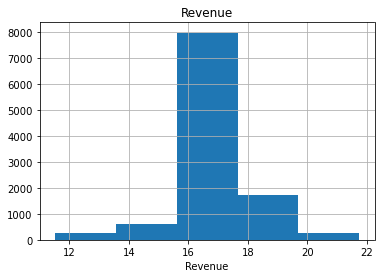

In [20]:
df["ln_rev"] = np.log(df["revenue"]) #Took the natural log of revenue to scale it down
df["ln_rev"].hist(bins=5) #The histogram was created with 5 equal bins.
plt.title('Revenue')
plt.xlabel("Revenue")

#### i. Exploring the relationship between revenue and budget

[[1.         0.70555273]
 [0.70555273 1.        ]]


Text(0.5, 1.0, 'Revenue and Budget')

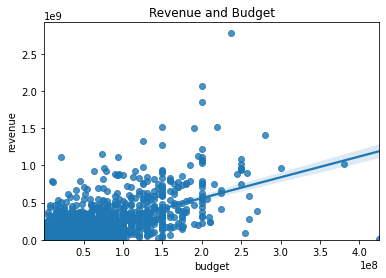

In [21]:
bud=np.array(df["budget"])
rev=np.array(df["revenue"])
print(np.corrcoef(bud,rev))
import seaborn as sns
sns.regplot(x="budget", y="revenue", data=df)
plt.ylim(0,)
plt.title("Revenue and Budget")

#### ii. Exploring the relationship between revenue and popularity score

[[1.         0.63539249]
 [0.63539249 1.        ]]


Text(0.5, 1.0, 'Revenue and Popularity')

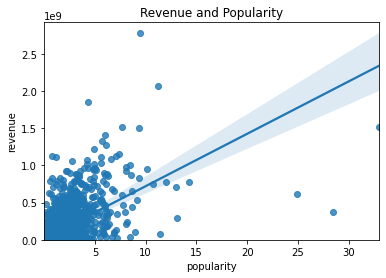

In [22]:
pop=np.array(df["popularity"])
rev=np.array(df["revenue"])
print(np.corrcoef(pop,rev))
sns.regplot(x="popularity", y="revenue", data=df)
plt.ylim(0,)
plt.title("Revenue and Popularity")

#### iii. Exploring the relationship between revenue and runtime

[[1.        0.2095643]
 [0.2095643 1.       ]]


Text(0.5, 1.0, 'Revenue and Runtime')

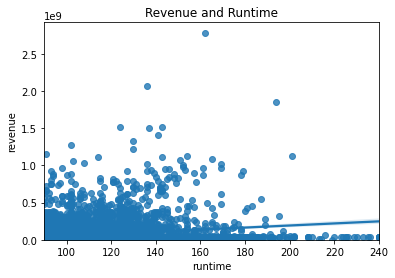

In [23]:
run=np.array(df["runtime"])
rev=np.array(df["revenue"])
print(np.corrcoef(run,rev))
sns.regplot(x="runtime", y="revenue", data=df)
plt.ylim(0,)
plt.title("Revenue and Runtime")

#### iv. Exploring the relationship between revenue and average votes

[[1.        0.1509652]
 [0.1509652 1.       ]]


Text(0.5, 1.0, 'Revenue and Average Vote')

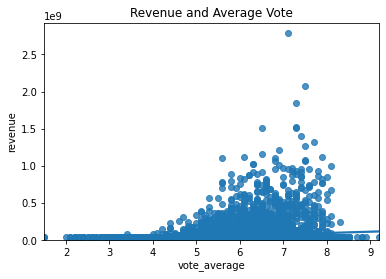

In [24]:
v_avg=np.array(df["vote_average"])
rev=np.array(df["revenue"])
print(np.corrcoef(v_avg,rev))
sns.regplot(x="vote_average", y="revenue", data=df)
plt.ylim(0,)
plt.title("Revenue and Average Vote")

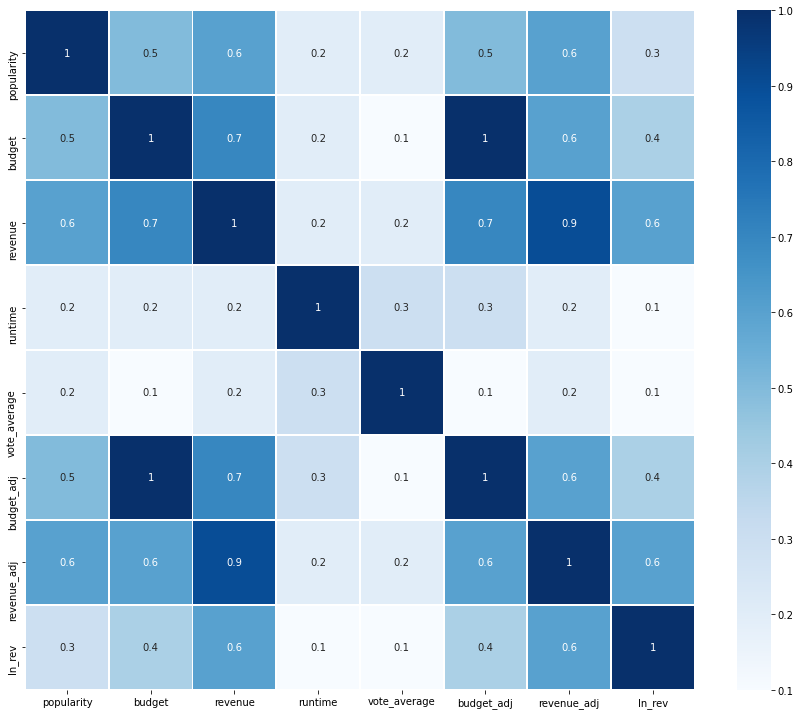

In [25]:
# Here, a heatmap was created to visiualize these relationships as a whole
null_cols=['id',
           'vote_count','release_year'] # excluded features
heat_map = df.drop(columns=null_cols, axis=1)
plt.figure(figsize=(15,12.5))
sns.heatmap(round(heat_map.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show()

 ### Interpretation
 From the correlation coefficients and the scatter plots above, it is obvious that there is a positive relationship between revenue and budget,popularity score, vote average and runtime. However, it is important to note that correlation does not necessarily imply causation.

### what is the impact of budget on revenue?
> This particular question will be addresed using a mulitiple linear regression model that relates revenue to budget,popularity score, vote average and runtime.

In [26]:
df['ln_rev_adj'] = np.log(df['revenue_adj']) #Taking the natural log of adjusted revenue
df['ln_bud_adj'] = np.log(df['budget_adj']) #Taking the natural log of adjusted budget
Z = df[['ln_bud_adj', 'popularity', 'runtime','vote_average']]
Y = df["ln_rev_adj"]

In [27]:
import statsmodels.api as sm
reg1output=sm.OLS(Y,Z).fit() # Regressing Y on Z
print(reg1output.summary()) # Printing output

                                 OLS Regression Results                                
Dep. Variable:             ln_rev_adj   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          5.286e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):                        0.00
Time:                        14:40:55   Log-Likelihood:                         -17921.
No. Observations:               10855   AIC:                                  3.585e+04
Df Residuals:                   10851   BIC:                                  3.588e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Result Interpretation
From the regression result above, it is obvious that the variables - ln_bud_adj, popularity, runtime and vote_average are statistically significant influcers of revenue. This is in informed by the individual p-values in the model. This regression model does not have a constant because when no movies are produced, revenue is expected to be zero. The R-Squared value of 0.995 tells us that about 99.5% variation in revenue can be explained by the independent variables. Also, the probability of f-stat (given as 0.00) tells us that the overall model is statistically significant.

<a id='conclusions'></a>
## Conclusions

- In this analysis, I have been able to explore the TMDb data set. As part of the data analysis process, I performed data cleaning such as addressing missing values, managing data ranges, correcting datatype to allow for robust analysis. 
- The dataset was further explored to allow gain insight into the existing relationships in the dataset using correlation values and scatter plots
- Finally, using regression analysis, I was able to conclude that variables like budget, runtime, etc are significant in explaining the variations in revenue. 

## Limitations

- Could not explore relationshps between categorical variables using correlations.
- Could not perform inferential analysis using categorical variables.